In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge

from sklearn.feature_selection import SequentialFeatureSelector

import matplotlib.pyplot as plt

# Question 1

### 1a.

I will use Ridge regression because we are trying to identify multiple features, implying that there is an importance on all of these features rather than only finding a few and ignoring the rest where lasso regression would have been better. I will use sklearns feature selection and a Ridge estimator in order to find ten features within the dataset and get the coordinate numbers.

### 1b.

In [2]:
# read in csv
mystery = pd.read_csv('mystery.dat', header = None)
mystery

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.63311,-1.71313,-0.48056,-0.32540,-0.05102,0.05634,-1.63462,-0.58081,0.70627,-2.06938,...,0.69346,0.49371,-0.15578,1.02650,0.48640,0.32758,-2.28887,-0.00430,-0.39673,-6.07560
1,0.82710,-0.45099,0.62209,-0.24694,0.53069,0.84492,0.37463,-0.61650,-0.00887,0.51328,...,1.12702,0.53821,1.69800,0.65812,0.18004,0.31097,0.42096,0.43610,-0.09575,4.03525
2,-0.25135,-0.22821,-0.65147,0.52365,-0.58971,0.02787,0.27812,0.21289,1.08754,-0.28801,...,-0.08484,0.00259,1.98580,0.39629,-1.37305,1.66343,-1.25645,-0.41212,0.78800,-3.57768
3,0.46192,0.16546,2.87388,-0.65411,0.76601,1.54346,-1.08101,-1.00728,-0.01883,0.41995,...,0.72389,1.27442,-0.69487,0.47128,0.54426,1.18577,0.00389,0.90909,1.44143,-1.01789
4,-1.50107,2.05339,0.03820,0.27116,-0.07920,-0.53648,0.32249,-0.57844,-0.66211,-0.73749,...,0.07916,-0.34523,1.09813,1.78102,-1.06170,-1.74101,1.96249,-0.86213,-1.88139,4.54025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.68050,-0.43706,1.08467,-0.08860,-0.75584,-0.51020,-0.12227,0.76625,0.09844,0.79460,...,1.39146,-2.31016,0.34400,0.46904,1.13855,0.54741,2.63132,-1.86386,-0.01147,-2.87495
97,-0.04866,0.29133,-1.72828,-0.45218,0.59248,0.51923,0.18951,-0.91447,0.36181,-0.20676,...,1.02579,-1.11850,1.11086,-1.74939,1.30350,1.47213,0.83292,-1.64844,0.99595,4.22825
98,0.85169,-0.63504,-1.96589,0.04994,0.98394,0.96469,-0.67908,-0.90963,-0.98677,-0.85608,...,-0.48633,0.45576,0.35485,-0.95341,0.47911,-0.92630,1.76321,-0.05456,-0.40289,-4.60459
99,0.50464,1.18625,-0.54312,0.11166,-0.40399,-0.63077,-1.34732,-0.97678,-0.62806,-0.23150,...,-0.38290,0.23060,-1.06765,-0.12734,-0.94222,0.94762,-1.79318,0.16694,-1.12890,-2.31289


In [3]:
# split data
X = mystery.iloc[: , :-1]
y = mystery.iloc[: , -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# create and fit classifier to select model
selector = SelectFromModel(estimator=Ridge(), threshold=-np.inf, max_features = 10).fit(X_train, y_train)

In [5]:
# get ten features
selected_feat = X_train.columns[(selector.get_support())]
selected_feat = selected_feat.tolist()
selected_feat

[1, 2, 4, 6, 10, 12, 16, 18, 22, 26]

The features that I have identified are: 1, 2, 4, 6, 10, 12, 16, 18, 22, and 26.

# Question 2

In [6]:
#read in csv
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
# split data
X = heart.iloc[: , :-1]
y = heart.iloc[: , -1:]

### 2a.

In [8]:
# split train and data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=103, random_state=0)

In [9]:
# create and fit classifier to select model
clf = LogisticRegression(max_iter=2000).fit(X_train, y_train.values.ravel())

In [10]:
# display model
clf.coef_

array([[ 0.01081608, -1.72593982,  0.73508357, -0.01307536, -0.00556325,
        -0.59211334,  0.15525541,  0.02985058, -0.79931386, -0.60528941,
         0.29144702, -0.78197393, -0.82098076]])

In [11]:
# create and fit classifier to select model
selection = SelectFromModel(estimator=clf, threshold=-np.inf, max_features = 3).fit(X_train, y_train.values.ravel())

In [12]:
# get 3 features
selection = X_train.columns[(selection.get_support())]
selection = selection.tolist()
selection

['sex', 'exang', 'thal']

The three most influential features would be sex, exang, and thal. 

### 2b.

In [13]:
# find test error
predictions = clf.predict(X_test)
testing_error = mean_squared_error(y_test,predictions)

print('The test error of my model is %s' % testing_error)

The test error of my model is 0.17475728155339806


### 2c.

In [14]:
# find validation error on training set
cv = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(max_iter=2000)
y_pred = cross_val_predict(model, X_train, y_train.values.ravel(), cv=cv)
testing_error1 = mean_squared_error(y_train,y_pred)
print('The training error of my 5-fold cross validation model is %s' % testing_error1)

The training error of my 5-fold cross validation model is 0.195


The training error from the 5-fold cross-validation was higher than the testing error.

# Question 3

### 3a. 

In [15]:
# stepwise regression
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

test_error = []
validation_error = []

for i in k:
    # stepwise regression
    step_reg = SequentialFeatureSelector(LogisticRegression(max_iter = 2000),
                                     n_features_to_select = i/len(k),
                                     direction='forward',
                                     scoring='neg_mean_squared_error',cv=None)
    selec_feat = step_reg.fit(X, y.values.ravel())

    # find select features
    features = X.columns[(selec_feat.get_support())]
    features = features.tolist()
    select = X[features]

    # split the data into train and test 
    X_train, X_test, y_train, y_test = train_test_split(select, y,test_size=0.2,random_state=0)

    # fit a logistic regression model
    logreg = LogisticRegression(max_iter = 2000)
    logreg.fit(X_train, y_train.values.ravel())

    # find test error
    y_pred = logreg.predict(X_test)
    testing_error = mean_squared_error(y_test,y_pred)
    test_error.append(testing_error)
    
    # find validation error on test set
    cv = KFold(n_splits=10, random_state=0, shuffle=True)
    model = LogisticRegression(max_iter = 2000)
    y_pred = cross_val_predict(model, X_test, y_test.values.ravel(), cv=cv)
    testing_error1 = mean_squared_error(y_test,y_pred)
    validation_error.append(testing_error1)

Text(0.5, 1.0, 'Test and Validation Error by K-value')

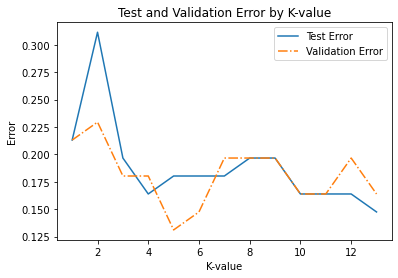

In [16]:
# plot graph
plt.plot(k, test_error, label = 'Test Error')
plt.plot(k, validation_error, '-.', label = 'Validation Error' )

plt.xlabel("K-value")
plt.ylabel("Error")
plt.legend()
plt.title('Test and Validation Error by K-value')

### 3b. 

In [17]:
# stepwise regression
step_reg = SequentialFeatureSelector(LogisticRegression(max_iter=5000),
                                     n_features_to_select = 2/13,
                                     direction='forward',
                                     scoring='neg_mean_squared_error',cv=None)
selec_feat = step_reg.fit(X, y.values.ravel())

# find select features
features = X.columns[(selec_feat.get_support())]
features = features.tolist()
features

['cp', 'ca']

In [18]:
select = X[features]

# fit a logistic regression model
logreg = LogisticRegression(max_iter = 2000)
logreg.fit(select.values, y.values.ravel())

LogisticRegression(max_iter=2000)

Text(0.5, 1.0, 'Decision Boundary for k=2')

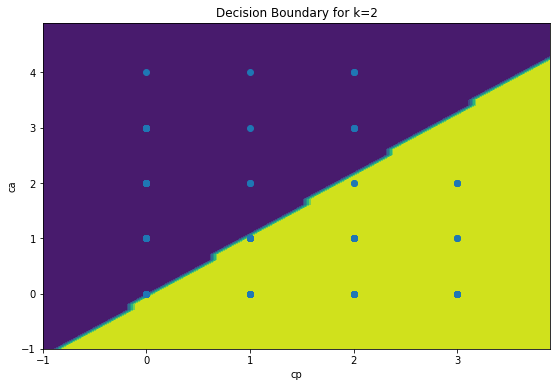

In [19]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = select.iloc[:, :1].min().min() - 1, select.iloc[:, :1].max().max() + 1
y_min, y_max = select.iloc[:, -1:].min().min() - 1, select.iloc[:, -1:].max().max() + 1

x_val, y_val = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

Z_val = logreg.predict(np.c_[x_val.ravel(), y_val.ravel()])
Z_val = Z_val.reshape(x_val.shape)


plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(x_val, y_val, Z_val)
plt.scatter(select.iloc[:, :1], select.iloc[:, -1:])
plt.xlabel('cp')
plt.ylabel('ca')
plt.title('Decision Boundary for k=2')